In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
from pyproj import CRS
from matplotlib import cm
import matplotlib.colors
import matplotlib.patches as mpatches

In [2]:
def pandas_dataset(file_path):
    df = pd.read_csv(file_path)
    
    df = df[['hack_license','pickup_datetime', 'dropoff_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'trip_distance']]
    
    df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
    df["dropoff_datetime"] = pd.to_datetime(df["dropoff_datetime"])
    df["hour"] = df["pickup_datetime"].map(lambda x: x.hour)
    df["day"] = df["pickup_datetime"].map(lambda x: x.day)
    return df

df = pandas_dataset('FOIL_2010_UNZIPPED.nosync/trip_data_2.csv')

/Users/kallejanssen/opt/anaconda3/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [3]:
paths = df[(df.hack_license == 2010014069) & (df.day == 23)] # & (df.day == 22)
print(paths["dropoff_datetime"] - paths["pickup_datetime"])

8485771   00:37:00
8536781   00:37:00
8565931   00:37:00
8585439   00:34:00
8616743   00:44:00
8694594   00:15:00
8713018   00:55:00
dtype: timedelta64[ns]


In [4]:
paths = df[(df.hack_license == 2010000311) & (df.day == 1)] # & (df.day == 10)
print(paths["dropoff_datetime"] - paths["pickup_datetime"])

109      00:16:00
2093     00:03:44
2604     00:04:56
125913   00:00:09
126022   00:16:50
129463   00:07:51
131925   00:08:14
135055   00:07:56
137757   00:04:11
139052   00:14:56
142895   00:06:12
144555   00:08:17
148777   00:06:47
154634   00:08:27
158512   00:09:08
164681   00:14:10
168188   00:03:50
170813   00:19:27
175577   00:11:16
177967   00:08:29
182230   00:04:47
186656   00:09:04
189265   00:04:23
191013   00:20:21
195676   00:08:23
197951   00:08:17
199537   00:33:04
dtype: timedelta64[ns]


In [5]:
street_map = gpd.read_file("geo_export_ec2e6150-c443-4cfc-9d22-8af438088d84.shp")

Occupied: 257
Empty: 210


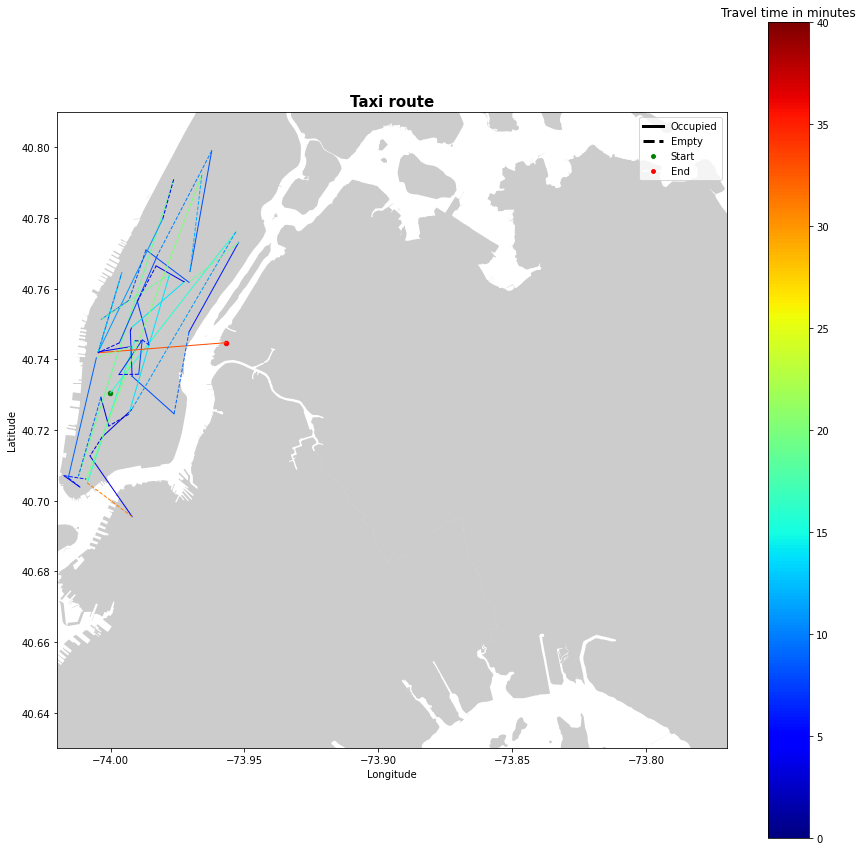

In [6]:
fig, ax = plt.subplots(figsize=(15,15))

street_map.plot(ax=ax, alpha=0.4,color='grey')

listi = [(i, j , k, l, pick_date, drop_date) for (i, j , k, l, pick_date, drop_date) in zip(paths["pickup_longitude"], paths["pickup_latitude"], paths["dropoff_longitude"], paths["dropoff_latitude"], paths["pickup_datetime"], paths["dropoff_datetime"])]

plt.scatter(listi[0][0], listi[0][1], color='green', s=20, label="Start")

plt.scatter(listi[len(listi)-1][2], listi[len(listi)-1][3], color='red', s=20, label="End")

time_spent_occupied = 0

for i in listi:
    time_spent_occupied += ((i[5] - i[4]).seconds//60)%60
    plt.plot([i[0], i[2]], [i[1],i[3]], linewidth = 1, color=cm.jet((((i[5] - i[4]).seconds//60)%60 / 40)))#, linestyle = "--")
    

new_listi = [(listi[i][2], listi[i][3], listi[i+1][0], listi[i+1][1], listi[i][5], listi[i+1][4]) for i in range(len(listi)-1)]

time_spent_empty = 0

for i in new_listi:
    time_spent_empty += ((i[5] - i[4]).seconds//60)%60
    plt.plot([i[0], i[2]], [i[1],i[3]], linewidth = 1, color=cm.jet((((i[5] - i[4]).seconds//60)%60 / 40)), linestyle = "--")
    
print("Occupied: {}".format(time_spent_occupied))
print("Empty: {}".format(time_spent_empty))

plt.title('Taxi route', fontsize=15,fontweight='bold')

plt.xlim(-74.02,-73.77)
plt.ylim( 40.63,40.81)


from matplotlib.lines import Line2D

colors = ['black', 'black']
lines = [Line2D([0], [0], color='black', linewidth=3), 
         Line2D([0], [0], color='black', linewidth=3, linestyle='--'),
         Line2D([0], [0], marker='o', color='w', markerfacecolor='g'), 
         Line2D([0], [0], marker='o', color='w', markerfacecolor='r')]
labels = ['Occupied', 'Empty', 'Start', 'End']
plt.legend(lines, labels)


sm = plt.cm.ScalarMappable(cmap=cm.jet, norm=matplotlib.colors.Normalize(vmin=0, vmax=40))
clb = plt.colorbar(sm)
clb.ax.set_title('Travel time in minutes')

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [7]:
drivers = pd.read_csv("FOIL_2010_UNZIPPED.nosync/2010.2.csv")

In [8]:
drivers = drivers.loc[(drivers['income_per_hour'] > 15.0)]

In [9]:
new_dr = drivers.sort_values(by=['income_per_hour'], ascending=False)

In [10]:
new_dr.loc[9001]

hack_license         2010014709
sum(wh1)                    177
sum(total_amount)       4993.58
income_per_hour         28.2123
label                       low
Name: 9001, dtype: object

In [11]:
new_dr

,hack_license,sum(wh1),sum(total_amount),income_per_hour,label
9924,2010001233,201,62035.03,308.631990,high
5826,2010010608,133,10679.44,80.296541,high
14592,2010009085,168,12864.47,76.574226,high
9249,2010007238,138,9815.31,71.125435,high
4552,2010026320,3,201.97,67.323333,high
...,...,...,...,...,...
16107,2010031554,17,256.43,15.084118,low
9889,2010024401,120,1808.49,15.070750,low
26195,2010009959,186,2800.32,15.055484,low
21013,2010018967,33,495.80,15.024242,low
